## Predict handwritten digits

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [4]:
# Load the digits data
digits = load_digits()

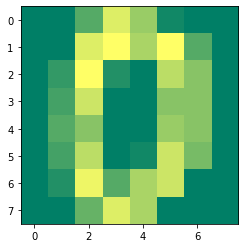

In [5]:
# Show how they looks like
plt.imshow(digits.images[0], cmap="summer")

In [6]:
# Show how looks training data

# We have converted the 8x8 matrix to 1x64 array
print(f"Data: {digits.data[0]}")
print(f"Target: {digits.target[0]}")

len(digits.data[0])

Data: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Target: 0


64

In [7]:
# Split dataset to test and train data
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=1234)

In [8]:
from sklearn.linear_model import LogisticRegression

# Create and fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\ssipikal\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
# Find the model score
model.score(x_test, y_test).round(2)

0.96

## Try it out

In [10]:
# Choose number of image in dataset
image_number = 5

This digit is: 5


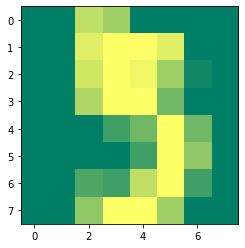

In [11]:
plt.imshow(digits.images[image_number], cmap="summer")
print(f"This digit is: {digits.target[image_number]}")

Now let's try what our model guess

In [12]:
prediction = model.predict([digits.data[image_number]])
print(f"The model prediction is: {prediction[0]}")

The model prediction is: 5


## Confusion matrix

Text(69.0, 0.5, 'Truth')

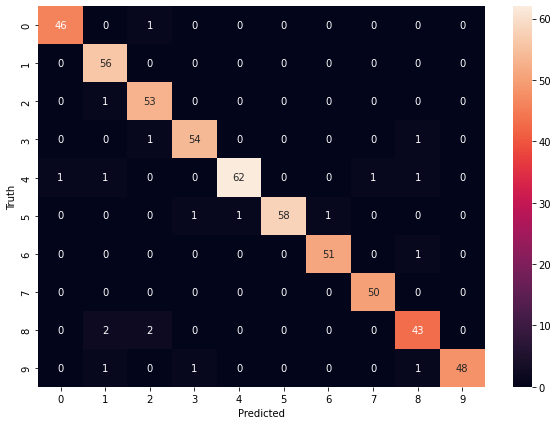

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)

# Make it a little bit bigger
plt.figure(figsize=(10,7))

# Plot by seaborn
sn.heatmap(cm, annot=True)

# Add axis labels
plt.xlabel("Predicted")
plt.ylabel("Truth")

The visualized confusion matrix is telling us how good is our model doing. If we look at the diagonal we can see how many precise predictions made our model. For example if we have a look on the number `2` on x axis we can see that there is non-zero element on rows: 0, 3 and 8. That means that the number `0` was one time confused as a number `2`, number `3` was one time confused as a number `2` and number `8` was 2 times confused as a number `2`.